# Import, load data 

In [45]:
import random
import pandas as pd
import numpy as np
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings(action='ignore') 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [3]:
path = "/mnt/d/data/jeju"

train = pd.read_csv(os.path.join(path, './train.csv'))
test = pd.read_csv(os.path.join(path, './test.csv'))

In [4]:
train

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0
...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0


In [5]:
test

,ID,timestamp,item,corporation,location
0,TG_A_J_20230304,2023-03-04,TG,A,J
1,TG_A_J_20230305,2023-03-05,TG,A,J
2,TG_A_J_20230306,2023-03-06,TG,A,J
3,TG_A_J_20230307,2023-03-07,TG,A,J
4,TG_A_J_20230308,2023-03-08,TG,A,J
...,...,...,...,...,...
1087,RD_F_J_20230327,2023-03-27,RD,F,J
1088,RD_F_J_20230328,2023-03-28,RD,F,J
1089,RD_F_J_20230329,2023-03-29,RD,F,J
1090,RD_F_J_20230330,2023-03-30,RD,F,J


In [6]:
train.describe(include="all")

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
count,59397,59397,59397,59397,59397,5.939700e+04,59397.000000
unique,59397,1523,5,6,2,NaN,NaN
top,TG_A_J_20190101,2019-01-01,TG,A,J,NaN,NaN
freq,1,39,15230,13707,35029,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.189453e+04,1131.680674
std,NaN,NaN,NaN,NaN,NaN,5.226400e+04,2029.941445
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000
25%,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000
50%,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000
75%,NaN,NaN,NaN,NaN,NaN,3.800000e+03,1519.000000


# EDA

## price(원/kg)

In [7]:
train["price(원/kg)"].value_counts()

0.0       35455
500.0        50
1000.0       45
550.0        42
400.0        41
          ...  
6234.0        1
5686.0        1
5818.0        1
5652.0        1
655.0         1
Name: price(원/kg), Length: 7094, dtype: int64

In [8]:
sorted_prices = train["price(원/kg)"].value_counts().sort_index()

In [9]:
sorted_prices

0.0        35455
50.0           1
55.0           1
60.0           1
88.0           1
           ...  
14375.0        2
14500.0        1
15015.0        1
15123.0        1
20909.0        1
Name: price(원/kg), Length: 7094, dtype: int64

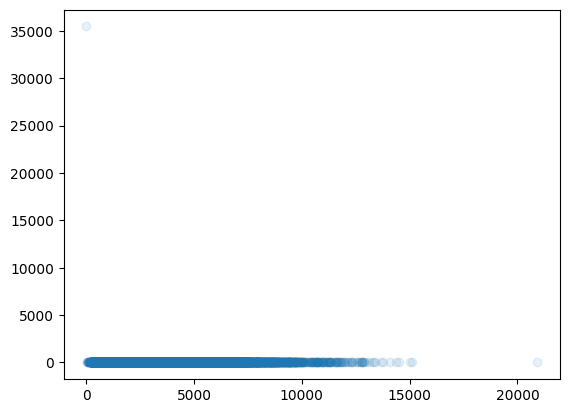

In [10]:
plt.scatter(sorted_prices.index, sorted_prices.values, alpha=0.1)

In [11]:
print(f"가격 중 0원 비율 {round(sum(train['price(원/kg)']==0) / len(train) * 100, 4)}%")

가격 중 0원 비율 59.6916%


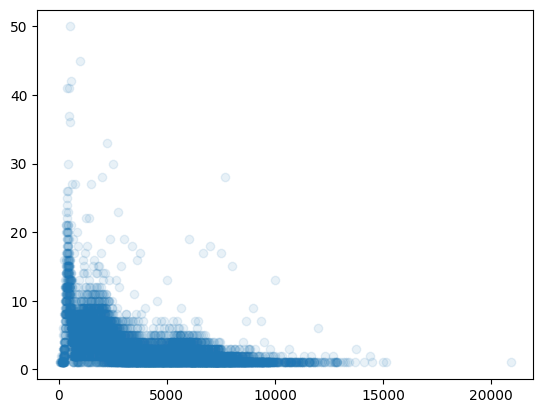

In [12]:
plt.scatter(sorted_prices.index[1:], sorted_prices.values[1:], alpha=0.1)

In [13]:
train[train["price(원/kg)"] > 15000]

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
7304,TG_C_J_20220427,2022-04-27,TG,C,J,55.0,20909.0
7306,TG_C_J_20220429,2022-04-29,TG,C,J,114.0,15123.0
7319,TG_C_J_20220512,2022-05-12,TG,C,J,194.0,15015.0


In [14]:
train[train["price(원/kg)"] > 13000]

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
6572,TG_C_J_20200425,2020-04-25,TG,C,J,236.0,13347.0
6576,TG_C_J_20200429,2020-04-29,TG,C,J,40.0,13750.0
6578,TG_C_J_20200501,2020-05-01,TG,C,J,80.0,13750.0
6581,TG_C_J_20200504,2020-05-04,TG,C,J,235.0,13404.0
6583,TG_C_J_20200506,2020-05-06,TG,C,J,48.0,13125.0
6941,TG_C_J_20210429,2021-04-29,TG,C,J,432.0,13243.0
6942,TG_C_J_20210430,2021-04-30,TG,C,J,235.0,13681.0
6947,TG_C_J_20210505,2021-05-05,TG,C,J,64.0,13750.0
7304,TG_C_J_20220427,2022-04-27,TG,C,J,55.0,20909.0
7306,TG_C_J_20220429,2022-04-29,TG,C,J,114.0,15123.0


눈대중으로 봤을때 귤 + 봄 + 낮은 수확량 -> 높은 가격  

In [15]:
train.groupby("item").mean()

,supply(kg),price(원/kg)
item,,
BC,1000.060071,910.196615
CB,11241.532567,152.187131
CR,5054.161992,273.118938
RD,27670.840003,187.073539
TG,14193.242484,3177.442022


In [16]:
train.groupby("item").median()

,supply(kg),price(원/kg)
item,,
BC,0.0,0.0
CB,0.0,0.0
CR,0.0,0.0
RD,0.0,0.0
TG,2456.0,2273.5


0을 제외하지 않았을때 중앙값이 0->절반이상이 0이니 이를 잘 처리하는게 중요할듯?  

In [17]:
train[train["price(원/kg)"]!=0].groupby("item").mean()

,supply(kg),price(원/kg)
item,,
BC,3029.353238,2757.141436
CB,52842.092901,715.373457
CR,25880.125360,1398.521134
RD,83450.869950,564.184158
TG,18515.022701,4144.962912


In [18]:
train[train["price(원/kg)"]!=0].groupby("item").median()

,supply(kg),price(원/kg)
item,,
BC,1608.0,2518.0
CB,10140.0,619.0
CR,17920.0,1159.0
RD,16660.0,468.0
TG,5985.0,3847.0


In [19]:
#시계열 특성을 학습에 반영하기 위해 timestamp를 월, 일, 시간으로 나눕니다
train['year'] = train['timestamp'].apply(lambda x : int(x[0:4]))
train['month'] = train['timestamp'].apply(lambda x : int(x[5:7]))
train['day'] = train['timestamp'].apply(lambda x : int(x[8:10]))

In [20]:
train[train["price(원/kg)"]!=0].groupby("year").median()

,supply(kg),price(원/kg),month,day
year,,,,
2019,7536.5,1904.5,4.0,16.0
2020,6277.5,2050.0,4.0,16.0
2021,7552.0,1874.5,4.0,16.0
2022,5880.0,2278.0,5.0,16.0
2023,11571.0,2088.0,2.0,14.0


In [21]:
grouped_prices = train[train["price(원/kg)"]!=0].groupby(["year", "item"]).median()["price(원/kg)"]

In [22]:
names = list(( train[train["price(원/kg)"]!=0].groupby(["year", "item"]).median()["price(원/kg)"].index))

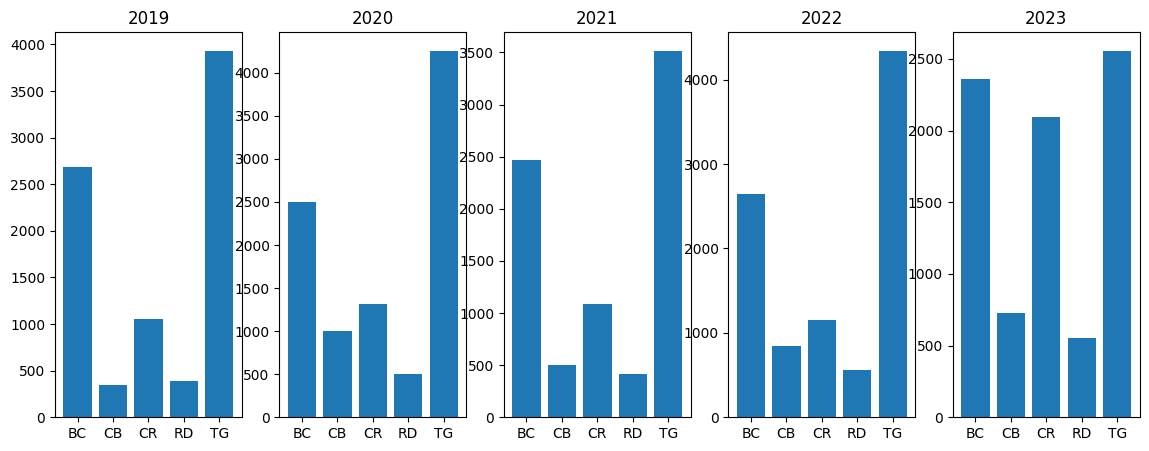

In [23]:
fi, axes = plt.subplots(1, 5, figsize=(14, 5))
years = [2019, 2020, 2021, 2022, 2023]
axes.flatten()
for i in range(5):
    axes[i].set_title(years[i])
    axes[i].bar(range(5), grouped_prices[years[i]])
    axes[i].set_xticks(range(5), [y for x, y in names[i*5:i*5+5]])

In [24]:
reset_group = grouped_prices.reset_index()

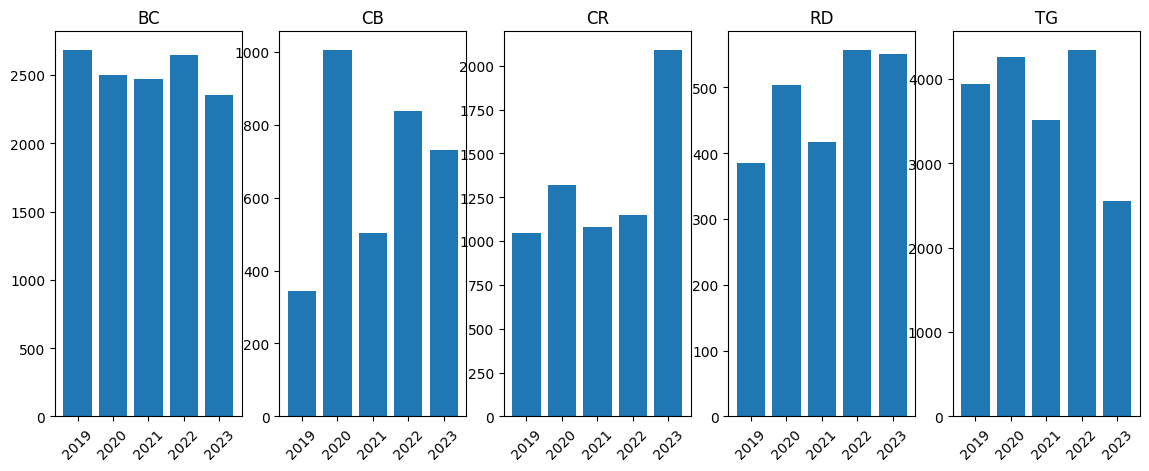

In [25]:
fi, axes = plt.subplots(1, 5, figsize=(14, 5))
fruits = ["BC", "CB","CR","RD","TG"]
axes.flatten()
for i in range(5):
    axes[i].set_title(fruits[i])
    axes[i].bar(range(5), reset_group[reset_group["item"]==fruits[i]]["price(원/kg)"])
    axes[i].set_xticks(range(5), years, rotation=45)    

### price(corporation, location)

In [31]:
nonzero_train = train[train["price(원/kg)"]!=0]

In [49]:
corps = list(nonzero_train.groupby("corporation").median().index)

([<matplotlib.axis.XTick at 0x7f6a7f0343a0>,
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E'),
  Text(5, 0, 'F')])

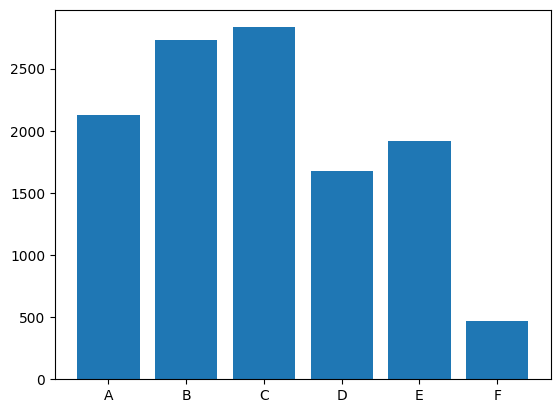

In [50]:
plt.bar(range(6), nonzero_train.groupby("corporation").median()["price(원/kg)"])
plt.xticks(range(6), corps)

In [51]:
locs = list(nonzero_train.groupby("location").median().index)

([<matplotlib.axis.XTick at 0x7f6a7ef42730>,
 [Text(0, 0, 'J'), Text(1, 0, 'S')])

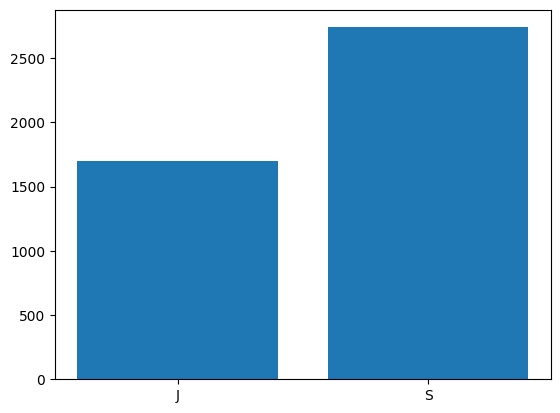

In [54]:
plt.bar(range(2), nonzero_train.groupby("location").median()["price(원/kg)"])
plt.xticks(range(2), locs)

In [59]:
nonzero_train[nonzero_train["corporation"]=="F"].describe(include="all")

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day
count,1388,1388,1388,1388,1388,1.388000e+03,1388.000000,1388.000000,1388.000000,1388.000000
unique,1388,807,2,1,1,NaN,NaN,NaN,NaN,NaN
top,CB_F_J_20190103,2019-01-03,RD,F,J,NaN,NaN,NaN,NaN,NaN
freq,1,2,803,1388,1388,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2.606437e+05,568.649135,2020.739193,4.304035,15.871758
std,NaN,NaN,NaN,NaN,NaN,2.062395e+05,300.575229,1.241434,3.181337,8.740642
min,NaN,NaN,NaN,NaN,NaN,3.840000e+03,50.000000,2019.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,9.319700e+04,378.000000,2020.000000,2.000000,8.000000
50%,NaN,NaN,NaN,NaN,NaN,2.208140e+05,472.000000,2021.000000,4.000000,16.000000
75%,NaN,NaN,NaN,NaN,NaN,3.928600e+05,652.250000,2022.000000,5.000000,23.000000


corporation"F"의 모든 상품은 모두 location"J"에서 생산or유통됨 또한 생산품목도 2개뿐임

In [60]:
nonzero_train[nonzero_train["corporation"]!="F"].describe(include="all")

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day
count,22554,22554,22554,22554,22554,22554.000000,22554.000000,22554.000000,22554.000000,22554.000000
unique,22554,1271,5,5,2,NaN,NaN,NaN,NaN,NaN
top,TG_A_J_20190103,2019-03-18,TG,A,J,NaN,NaN,NaN,NaN,NaN
freq,1,33,11675,5809,13539,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,15284.447350,2945.337944,2020.680722,5.493970,15.780926
std,NaN,NaN,NaN,NaN,NaN,23149.962225,2350.389428,1.230206,3.793217,8.700612
min,NaN,NaN,NaN,NaN,NaN,6.000000,60.000000,2019.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,1365.000000,1156.000000,2020.000000,2.000000,8.000000
50%,NaN,NaN,NaN,NaN,NaN,6032.000000,2165.000000,2021.000000,4.000000,16.000000
75%,NaN,NaN,NaN,NaN,NaN,19334.350000,4420.750000,2022.000000,9.000000,23.000000


In [62]:
nonzero_train[nonzero_train["corporation"]=="F"]["item"].value_counts()

RD    803
CB    585
Name: item, dtype: int64

In [63]:
nonzero_train["item"].value_counts()

TG    11675
BC     4525
RD     4040
CR     2082
CB     1620
Name: item, dtype: int64

In [75]:
nonzero_train[nonzero_train["location"]=="J"].describe()

,supply(kg),price(원/kg),year,month,day
count,1.492700e+04,14927.000000,14927.000000,14927.000000,14927.000000
mean,3.527624e+04,2493.006632,2020.719703,5.247739,15.778790
std,9.721628e+04,2332.424268,1.232386,3.809935,8.688991
min,8.000000e+00,50.000000,2019.000000,1.000000,1.000000
25%,1.066500e+03,838.000000,2020.000000,2.000000,8.000000
50%,6.926000e+03,1701.000000,2021.000000,4.000000,16.000000
75%,2.140000e+04,3227.000000,2022.000000,9.000000,23.000000
max,1.222800e+06,20909.000000,2023.000000,12.000000,31.000000


In [76]:
nonzero_train[nonzero_train["location"]!="J"].describe()

,supply(kg),price(원/kg),year,month,day
count,9015.000000,9015.000000,9015.00000,9015.000000,9015.000000
mean,19958.995868,3328.377926,2020.62518,5.718469,15.798447
std,28677.075542,2282.922845,1.22626,3.686269,8.726032
min,6.000000,60.000000,2019.00000,1.000000,1.000000
25%,2250.500000,1516.000000,2020.00000,2.000000,8.000000
50%,7397.000000,2741.000000,2021.00000,5.000000,16.000000
75%,27210.000000,5250.000000,2022.00000,9.000000,23.000000
max,271156.000000,12667.000000,2023.00000,12.000000,31.000000


In [80]:
nonzero_train[nonzero_train["location"]=="J"]["item"].value_counts()

TG    5505
BC    3234
RD    2561
CR    2046
CB    1581
Name: item, dtype: int64

In [81]:
nonzero_train[nonzero_train["location"]=="S"]["item"].value_counts()

TG    6170
RD    1479
BC    1291
CB      39
CR      36
Name: item, dtype: int64

In [86]:
nonzero_train[nonzero_train["location"]=="J"].groupby("item").median()

,supply(kg),price(원/kg),year,month,day
item,,,,,
BC,1672.0,2477.0,2021.0,3.0,16.0
CB,10372.0,636.0,2021.0,3.0,16.0
CR,18800.0,1164.0,2021.0,3.0,16.0
RD,17240.0,470.0,2021.0,4.0,15.0
TG,3184.0,3337.0,2021.0,7.0,16.0


In [87]:
nonzero_train[nonzero_train["location"]=="S"].groupby("item").median()

,supply(kg),price(원/kg),year,month,day
item,,,,,
BC,1480.0,2622.0,2021.0,3.0,16.0
CB,3128.0,416.0,2019.0,2.0,14.0
CR,10080.0,977.5,2020.0,1.5,16.5
RD,14880.0,464.0,2021.0,3.0,16.0
TG,9260.0,4163.5,2021.0,6.0,16.0
